In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
files_path = "datasets/VOC2007/JPEGImages/*.jpg"
filesname = glob.glob(files_path)
print(len(filesname))

9963


In [105]:
def process_image(im):
    with tf.device('/cpu:0'):
        image_tensor = tf.convert_to_tensor(im)
        float_image_tensor = tf.image.convert_image_dtype(image_tensor,tf.float32)
        float_resized_image = tf.image.resize_images(float_image_tensor,(224,224))
        uint_resized_image = tf.image.convert_image_dtype(float_resized_image,tf.uint8)
        return uint_resized_image

def generate_images():
    for f in filesname:
        print("Fetching ", f)
        yield tf.Session(config=tf.ConfigProto(log_device_placement=True)).run(process_image(Image.open(f)))
        

Fetching  datasets/VOC2007/JPEGImages/008876.jpg


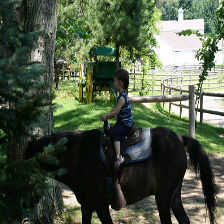

In [106]:
for im in generate_images():
    x = im
    break
Image.fromarray(x)    

In [107]:
ds = tf.data.Dataset.from_generator(generate_images,tf.uint8,(224,224,3))

In [108]:
ds = ds.batch(10)

In [109]:
iterator = ds.make_one_shot_iterator()

In [110]:
im_batch = iterator.get_next()

In [111]:
im_batch

<tf.Tensor 'IteratorGetNext_7:0' shape=(?, 224, 224, 3) dtype=uint8>

In [122]:
sess = tf.Session()
out = sess.run(im_batch)

Fetching  datasets/VOC2007/JPEGImages/008876.jpg
Fetching  datasets/VOC2007/JPEGImages/009815.jpg
Fetching  datasets/VOC2007/JPEGImages/005038.jpg
Fetching  datasets/VOC2007/JPEGImages/000825.jpg
Fetching  datasets/VOC2007/JPEGImages/003778.jpg
Fetching  datasets/VOC2007/JPEGImages/006692.jpg
Fetching  datasets/VOC2007/JPEGImages/001331.jpg
Fetching  datasets/VOC2007/JPEGImages/004375.jpg
Fetching  datasets/VOC2007/JPEGImages/004274.jpg
Fetching  datasets/VOC2007/JPEGImages/008054.jpg


In [123]:
out.shape

(10, 224, 224, 3)

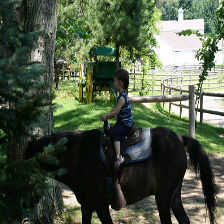

In [124]:
Image.fromarray(out[0])

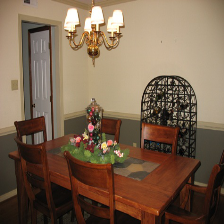

In [125]:
Image.fromarray(out[1])

In [126]:
out = sess.run(im_batch)

Fetching  datasets/VOC2007/JPEGImages/007208.jpg
Fetching  datasets/VOC2007/JPEGImages/005078.jpg
Fetching  datasets/VOC2007/JPEGImages/006182.jpg
Fetching  datasets/VOC2007/JPEGImages/005648.jpg
Fetching  datasets/VOC2007/JPEGImages/007386.jpg
Fetching  datasets/VOC2007/JPEGImages/006981.jpg
Fetching  datasets/VOC2007/JPEGImages/002999.jpg
Fetching  datasets/VOC2007/JPEGImages/006095.jpg
Fetching  datasets/VOC2007/JPEGImages/003931.jpg
Fetching  datasets/VOC2007/JPEGImages/001646.jpg


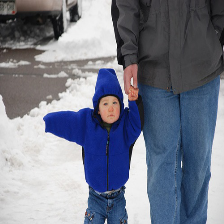

In [127]:
Image.fromarray(out[0])

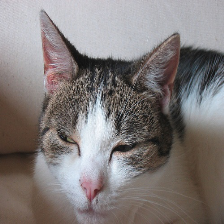

In [128]:
Image.fromarray(out[1])